In [2]:
#"""
# extract_face(face: Image.fromarray) -> dict

# for face in faces:
#     - face = ToArray(face)
#     - data = PredictFace(face)
#     - blobUrl = UploadFaceToBucket(face)
#     - InsertDataToDB(data, blobURL)
# """

In [1]:
from extract import Extract
from predict import Predict 
from matplotlib import pyplot as plt 
import cv2
import numpy as np

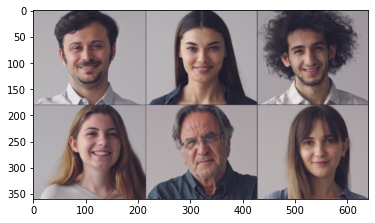

In [2]:
extract = Extract()
image_path = "X:/bangkit-project/ml-project/test_image/6_faces.jpg"
image = extract.read_image(image_path)
plt.imshow(image)

In [3]:
list_of_faces = extract.extract_face_to_list(image)

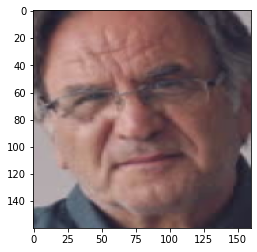

In [4]:
list_of_faces[0].dtype
image_1=np.array(list_of_faces[0], dtype='uint8')
plt.imshow(image_1)

((160, 160, 3), dtype('uint8'))

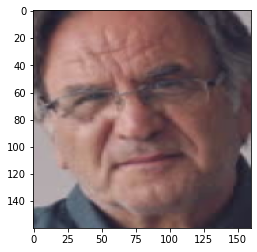

In [5]:
image_1 = cv2.resize(image_1, (160,160))
plt.imshow(image_1)
image_1.shape, image_1.dtype

In [6]:
from predict import Predict

predict = Predict("X:/bangkit-project/ml-project/encodings.pkl", "X:/bangkit-project/ml-project/model/facenet_keras_weights.h5")

In [7]:
data = predict.predict_face(image_1)

Doesnt recognize
